### Style-Human
* StyleGAN 모델을 기반으로 전신 이미지를 생성하는 데에 특화된 모델
* https://github.com/stylegan-human/StyleGAN-Human

### 가상환경 생성
* style-human 모델은 python 3.8.5, pytorch 1.9.1 + 11.1 환경에서 훈련되었다고 한다.

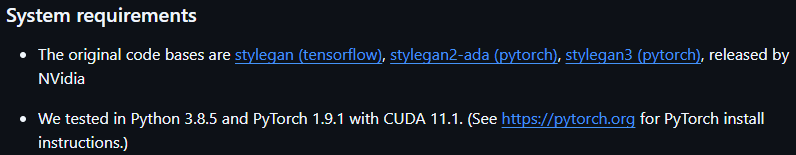

* 가상환경 생성 후 설치

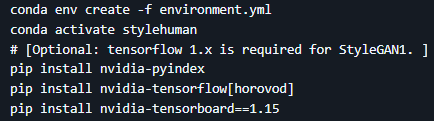

In [ ]:
# conda에서 가상환경 생성
!conda create -n style-human python=3.8
!conda activate style-human
!conda install ipykernel --force-reinstall
!python -m ipykernel install --user --name style-human --display-name "Python (style-human)"

In [ ]:
# 라이브러리 설치
# conda-forge 채널에 호환되는 버전이 없어서 cuda 관련 패키지는 pip으로 설치
!pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
!conda install -c conda-forge opencv ninja dlib scipy tqdm requests matplotlib scikit-image

In [6]:
!conda list

# packages in environment at C:\Users\user\.conda\envs\style-human:
#
# Name                    Version                   Build  Channel
aom                       3.6.1                h63175ca_0    conda-forge
asttokens                 2.0.5              pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
blosc                     1.21.5               hdccc3a2_0    conda-forge
brotli                    1.0.9                hcfcfb64_9    conda-forge
brotli-bin                1.0.9                hcfcfb64_9    conda-forge
brotli-python             1.0.9            py38hd3f51b4_9    conda-forge
bzip2                     1.0.8                h2466b09_7    conda-forge
c-blosc2                  2.12.0               h183a6f4_0    conda-forge
ca-certificates           2024.12.14           h56e8100_0    conda-forge
cairo                     1.18.0               h91e5215_2    conda-forge
certifi                   2024.8.30          pyhd8ed1ab_0    conda-forge
cffi         

In [7]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(torch.__version__)
print(device)

1.9.1+cu111
cuda


In [1]:
!git clone https://github.com/stylegan-human/StyleGAN-Human

'StyleGAN-Human'에 복제합니다...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 361 (delta 123), reused 301 (delta 98), pack-reused 0 (from 0)
오브젝트를 받는 중: 100% (361/361), 74.85 MiB | 11.48 MiB/s, 완료.
델타를 알아내는 중: 100% (123/123), 완료.


In [1]:
import os
os.chdir(r'D:\project\GAN\4. style-HUMAN\StyleGAN-Human')
current = os.getcwd()
print(current)

D:\project\GAN\4. style-HUMAN\StyleGAN-Human
